# Final Project Part 1

## Meta Stock Returns Analysis (2018 - 2023)

- In this analysis, we explore the impact of significant events on the stock price of Meta Platforms (formerly known as Facebook) from the beginning of 2018 through the end of August 2023.

##### Significant Events Impacting Meta's Stock Price

1. **2023** – Launch of Threads by Meta
2. **2023** – Twitter's legal threat over Threads
3. **2022** – Meta announces a reduction of 11,000 jobs
4. **2022** – Meta's warning about potentially removing news if Congress passes a collective bargaining bill
5. **2021** – Facebook rebrands to Meta Platforms

Each event is analyzed using Event Study methodology to quantify the impact on Meta's stock price.

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy.stats import t
from pandas.tseries.offsets import BDay
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import scipy.stats as stats
from IPython.display import Markdown, display
import pandas_datareader as pdr
from datetime import datetime
from StockEventAnalyzer import StockEventAnalyzer, style_plot, style_total

# Define a custom color palette
custom_palette = ['#08F7FE', '#FE53BB', '#F5D300', '#00ff41']  # Teal, Pink, Yellow, Neon Green
sns.set_palette(custom_palette)

sns.set_style("darkgrid", {
    "axes.facecolor": "#2c2c2c",
    "grid.color": "#4d4d4d",
    "grid.linestyle": "--",
    "axes.labelcolor": "#fc8d62",
    "axes.edgecolor": "#66c2a5",
    "xtick.color": "#66c2a5",
    "ytick.color": "#66c2a5",
    "axes.titlecolor": "#f4c542",
    "text.color": "#66c2a5"
})

        # Formatting hypothesis testing as Markdown
hypothesis_testing_md = """
### Hypothesis Testing
Hypothesis testing is performed using a two-tailed t-test.

$$ H_0: \mu = 0 $$

$$ H_A: \mu \\neq 0 $$

Where $ \mu $ is the mean of the sample. The critical t-value is calculated using the significance level $ \\alpha $ and the degrees of freedom $ df $.

$$ t_{crit} = t_{\\alpha/2, df} $$

### Calculating Returns
Daily returns are calculated using `pct_change()` on adjusted closing prices.

$$ R_t = \\frac{P_t - P_{t-1}}{P_{t-1}} $$

Where $ R_t $ is the return at time $ t $, $ P_t $ is the price at time $ t $, and $ P_{t-1} $ is the price at time $ t-1 $.

### Expected and Abnormal Returns
Expected returns are calculated as the product of beta and market returns. Abnormal returns are the difference between actual stock returns and expected returns.

$$ AR_t = R_{i,t} - (\\alpha + \\beta R_{m,t}) $$

### Calculating the Average Abnormal Return (AAR)
The average abnormal return is calculated as the sum of abnormal returns divided by the number of observations.
$$
AAR = \\frac{\\sum_{i=1}^{n} AR_i}{n}
$$

### Beta Calculation
Beta is calculated using the following formula:
$$
\\beta = \\frac{cov(R_i, R_m)}{var(R_m)}
$$

Where $ R_i $ is the stock returns and $ R_m $ is the market returns.

### Cumulative Returns
Cumulative returns are calculated using the following formula:
$$
CR_t = (1 + R_t) * CR_{t-1}
$$

Where $ CR_t $ is the cumulative return at time $ t $ and $ R_t $ is the return at time $ t $. Cumulative returns are normalized to start at 1.

### When is an Event Significant?
An event is considered significant if the t-statistic is greater than the critical t-value.
$$
|t| > t_{crit}
$$

### Below is our Analysis of the Events

    """

display(Markdown(hypothesis_testing_md))



### Hypothesis Testing
Hypothesis testing is performed using a two-tailed t-test.

$$ H_0: \mu = 0 $$

$$ H_A: \mu \neq 0 $$

Where $ \mu $ is the mean of the sample. The critical t-value is calculated using the significance level $ \alpha $ and the degrees of freedom $ df $.

$$ t_{crit} = t_{\alpha/2, df} $$

### Calculating Returns
Daily returns are calculated using `pct_change()` on adjusted closing prices.

$$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} $$

Where $ R_t $ is the return at time $ t $, $ P_t $ is the price at time $ t $, and $ P_{t-1} $ is the price at time $ t-1 $.

### Expected and Abnormal Returns
Expected returns are calculated as the product of beta and market returns. Abnormal returns are the difference between actual stock returns and expected returns.

$$ AR_t = R_{i,t} - (\alpha + \beta R_{m,t}) $$

### Calculating the Average Abnormal Return (AAR)
The average abnormal return is calculated as the sum of abnormal returns divided by the number of observations.
$$
AAR = \frac{\sum_{i=1}^{n} AR_i}{n}
$$

### Beta Calculation
Beta is calculated using the following formula:
$$
\beta = \frac{cov(R_i, R_m)}{var(R_m)}
$$

Where $ R_i $ is the stock returns and $ R_m $ is the market returns.

### Cumulative Returns
Cumulative returns are calculated using the following formula:
$$
CR_t = (1 + R_t) * CR_{t-1}
$$

Where $ CR_t $ is the cumulative return at time $ t $ and $ R_t $ is the return at time $ t $. Cumulative returns are normalized to start at 1.

### When is an Event Significant?
An event is considered significant if the t-statistic is greater than the critical t-value.
$$
|t| > t_{crit}
$$

### Below is our Analysis of the Events

    

### A. Event Study Analysis

Using Python, we plot Meta's stock returns and overlay the events to observe their impacts:


### Event Analysis

| Metric | Value |
| --- | --- |
| **Event** | Threads Launch |
| **Base Stock** | META |
| **Market** | ^GSPC |
| **Date** | 2023-07-05 |
| **Beta** | 1.82 |
| **Estimation Window** | 90 days before/after event |
| **Event Window** | 5 days before/after event |
| **Observations** | 9 trading days |

### Returns
| Metric | Value |
| --- | --- |
| **Cumulative AR** | 1.40% |
| **Average AR** | 0.16% |

### Hypothesis Testing
| Metric | Value |
| --- | --- |
| **Significance Level** | 0.05 |
| **Degrees of Freedom** | 8 |
| **Critical T-value** | 1.977 |
| **T-stat for AAR** | 0.451 |
| **T-stat for CAR** | 1.353 |
| **SD of AAR, CAR** | 0.0034, 0.0103 |

### Significance
| Metric | Value |
| --- | --- |
| **Is T-stat for AR significant?** | No |
| **Is T-stat for CAR significant?** | No |
| **Is CAR positive?** | Yes |
| **Is AAR positive?** | Yes |

### Expected, Actual, and Abnormal Returns

| Date | Expected Return | Actual Return | Abnormal Return |
| --- | --- | --- | --- |
| 2023-06-28 | -0.06% | -0.61% | -0.55% |
| 2023-06-29 | 0.81% | -1.32% | -2.13% |
| 2023-06-30 | 2.23% | 1.94% | -0.30% |
| 2023-07-03 | 0.21% | -0.33% | -0.55% |
| 2023-07-05 | -0.36% | 2.92% | 3.28% |
| 2023-07-06 | -1.44% | -0.81% | 0.63% |
| 2023-07-07 | -0.52% | -0.50% | 0.02% |
| 2023-07-10 | 0.44% | 1.23% | 0.79% |
| 2023-07-11 | 1.23% | 1.42% | 0.20% |


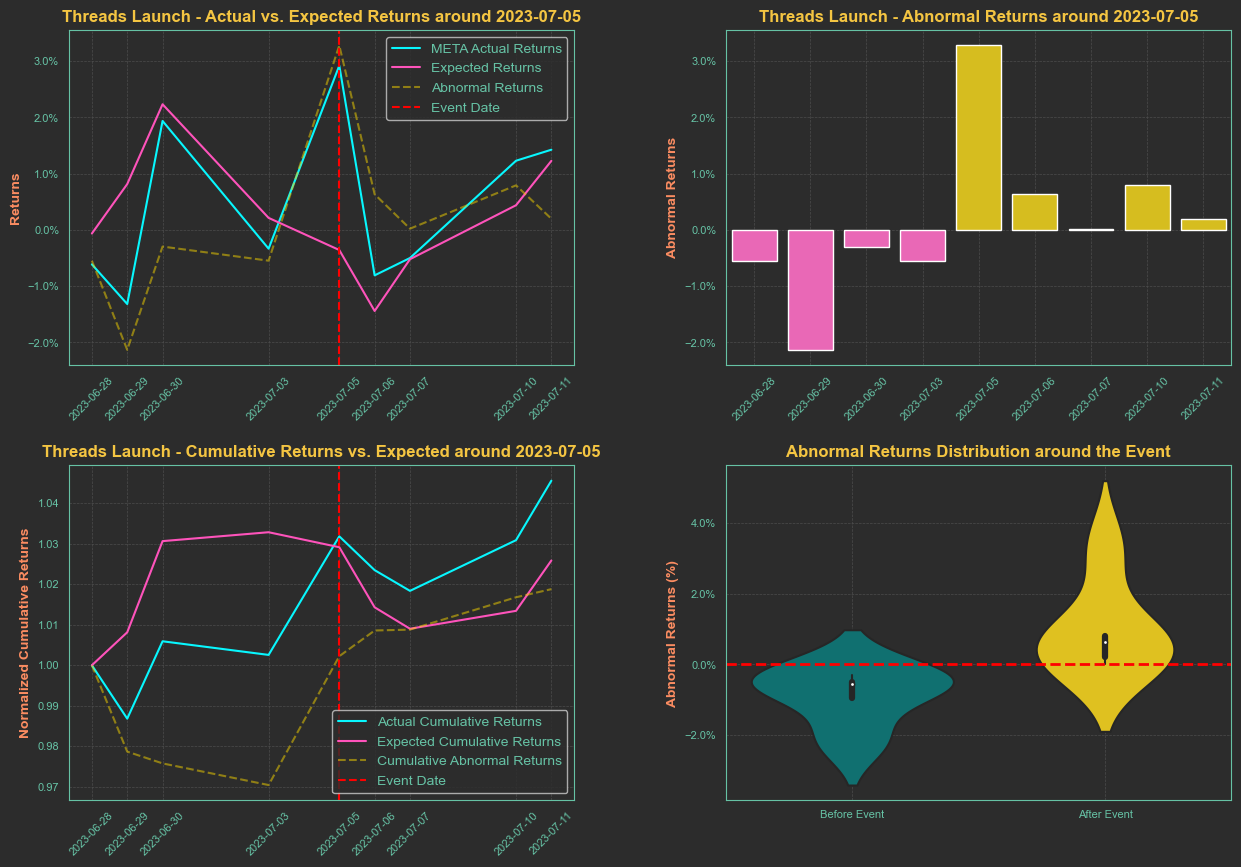

In [2]:
### the commented out events are very interesting, but they are not used in this analysis -- I recommend LLaMA as a good example of event studys. 
analyzer = StockEventAnalyzer("META", "^GSPC", bef_event=5, aft_event=5, window_offset=30, window_size=180)
meta_events = [
#    {"event": "Llama 1", "date": "2023-02-01"},
#    {"event": "Leak of LLaMA Model", "date": "2023-03-01"},
#    {"event": "Llama 2", "date": "2023-07-18"},
#    {"event": "ChatGPT Debut", "date": "2022-11-30"},
#    {"event": "GPT-4 Debut", "date": "2023-03-14"},
    {"event": "Threads Launch", "date": "2023-07-05"}
]
for event in meta_events:
    analyzer.analyze_event(event)

### Event (a): Threads launch:

- The Threads launch by Meta resulted in a positive yet statistically insignificant impact on the company's stock price, with a 1.40% cumulative abnormal return. The highest abnormal return occurred on the event day, suggesting investor optimism about Meta's innovation capabilities, but this was not strong enough to be deemed statistically significant.



### Event Analysis

| Metric | Value |
| --- | --- |
| **Event** | Twitter Vs. Meta |
| **Base Stock** | META |
| **Market** | ^GSPC |
| **Date** | 2023-07-06 |
| **Beta** | 1.81 |
| **Estimation Window** | 90 days before/after event |
| **Event Window** | 5 days before/after event |
| **Observations** | 9 trading days |

### Returns
| Metric | Value |
| --- | --- |
| **Cumulative AR** | 4.31% |
| **Average AR** | 0.48% |

### Hypothesis Testing
| Metric | Value |
| --- | --- |
| **Significance Level** | 0.05 |
| **Degrees of Freedom** | 8 |
| **Critical T-value** | 1.977 |
| **T-stat for AAR** | 1.218 |
| **T-stat for CAR** | 3.655 |
| **SD of AAR, CAR** | 0.0039, 0.0118 |

### Significance
| Metric | Value |
| --- | --- |
| **Is T-stat for AR significant?** | No |
| **Is T-stat for CAR significant?** | Yes |
| **Is CAR positive?** | Yes |
| **Is AAR positive?** | Yes |

### Expected, Actual, and Abnormal Returns

| Date | Expected Return | Actual Return | Abnormal Return |
| --- | --- | --- | --- |
| 2023-06-29 | 0.81% | -1.32% | -2.13% |
| 2023-06-30 | 2.22% | 1.94% | -0.29% |
| 2023-07-03 | 0.21% | -0.33% | -0.55% |
| 2023-07-05 | -0.36% | 2.92% | 3.28% |
| 2023-07-06 | -1.44% | -0.81% | 0.63% |
| 2023-07-07 | -0.52% | -0.50% | 0.02% |
| 2023-07-10 | 0.44% | 1.23% | 0.79% |
| 2023-07-11 | 1.22% | 1.42% | 0.20% |
| 2023-07-12 | 1.34% | 3.70% | 2.36% |


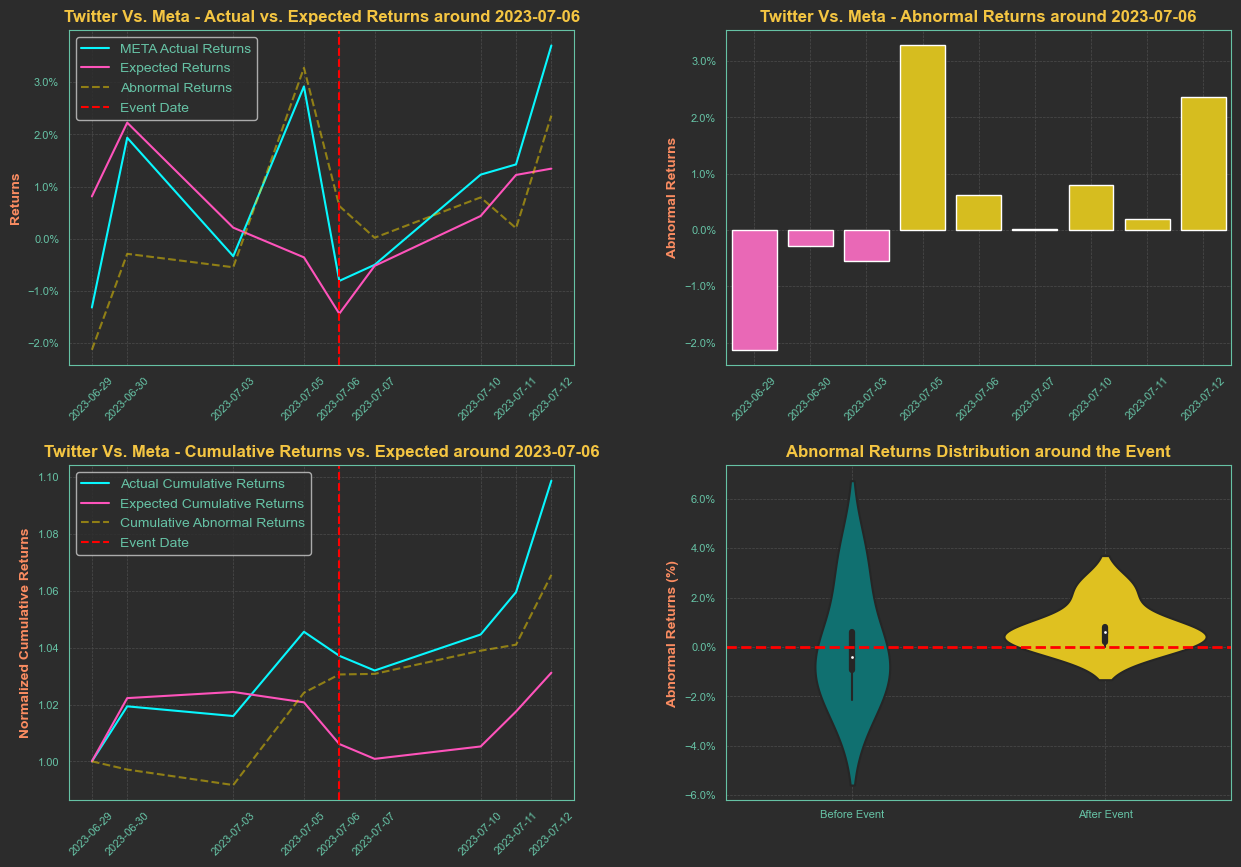

In [3]:
meta_events = [    
    {"event": "Twitter Vs. Meta", "date": "2023-07-06"}
]
for event in meta_events:
    analyzer.analyze_event(event)

### Event (b): Twitter's legal 

The Twitter versus Meta event analysis indicates a complex market response. The legal action by Twitter seems to have had an initial negative impact on Meta's stock price, as evidenced by a slight dip in the actual returns compared to expected returns. However, the cumulative abnormal return (CAR) of 4.31% and the positive average abnormal return (AAR) of 0.48% over the event window suggest a broader positive market reaction in the medium term.

The T-statistic for CAR is 3.655, which is above the critical T-value of 1.977, indicating that the positive CAR is statistically significant at the 5% significance level, suggesting the market eventually perceived the events as potentially beneficial for Meta's long-term position.

#### Problems with Event Study Methodology:

Given the proximity of the Twitter legal action to the Threads launch, it is challenging to isolate the effects of each event. The positive CAR could be influenced by the residual optimism from the Threads launch. This overlap highlights a limitation of the event study methodology, especially when significant events occur close together, making it difficult to disentangle their individual impacts on stock performance.

Therefore, while the Event Study methodology is powerful, it may not be perfect in certain case such as the above two.


### Event Analysis

| Metric | Value |
| --- | --- |
| **Event** | 11,000 Job Cuts |
| **Base Stock** | META |
| **Market** | ^GSPC |
| **Date** | 2022-11-09 |
| **Beta** | 1.74 |
| **Estimation Window** | 90 days before/after event |
| **Event Window** | 5 days before/after event |
| **Observations** | 10 trading days |

### Returns
| Metric | Value |
| --- | --- |
| **Cumulative AR** | 15.30% |
| **Average AR** | 1.53% |

### Hypothesis Testing
| Metric | Value |
| --- | --- |
| **Significance Level** | 0.05 |
| **Degrees of Freedom** | 9 |
| **Critical T-value** | 1.976 |
| **T-stat for AAR** | 1.745 |
| **T-stat for CAR** | 5.519 |
| **SD of AAR, CAR** | 0.0088, 0.0277 |

### Significance
| Metric | Value |
| --- | --- |
| **Is T-stat for AR significant?** | No |
| **Is T-stat for CAR significant?** | Yes |
| **Is CAR positive?** | Yes |
| **Is AAR positive?** | Yes |

### Expected, Actual, and Abnormal Returns

| Date | Expected Return | Actual Return | Abnormal Return |
| --- | --- | --- | --- |
| 2022-11-02 | -4.35% | -4.89% | -0.55% |
| 2022-11-03 | -1.84% | -1.80% | 0.04% |
| 2022-11-04 | 2.37% | 2.11% | -0.25% |
| 2022-11-07 | 1.67% | 6.53% | 4.86% |
| 2022-11-08 | 0.97% | -0.26% | -1.23% |
| 2022-11-09 | -3.61% | 5.18% | 8.80% |
| 2022-11-10 | 9.64% | 10.25% | 0.61% |
| 2022-11-11 | 1.61% | 1.03% | -0.58% |
| 2022-11-14 | -1.55% | 1.06% | 2.62% |
| 2022-11-15 | 1.52% | 2.50% | 0.99% |


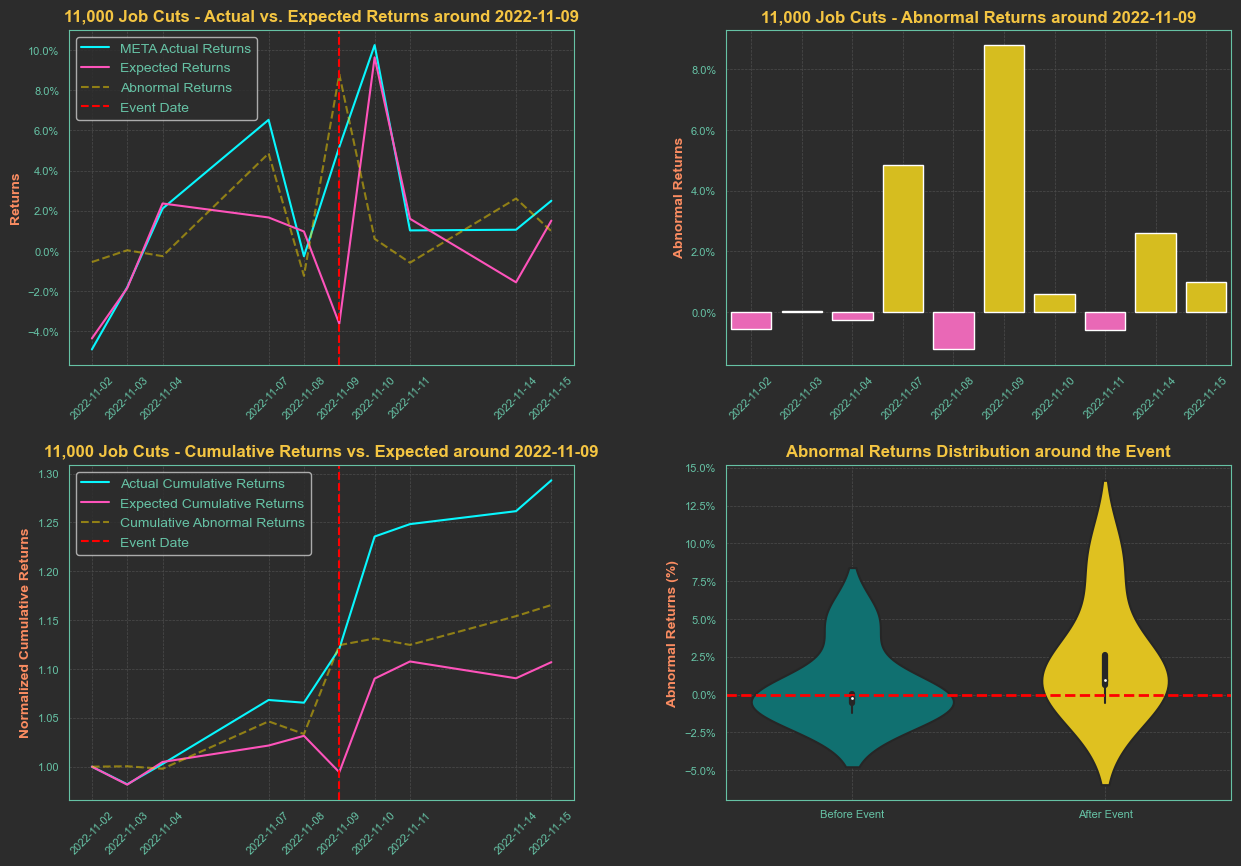

In [4]:
meta_events = [
    {"event": "11,000 Job Cuts", "date": "2022-11-9"}
]
for event in meta_events:
    analyzer.analyze_event(event)


### Event (c): Job cuts announcement

The Meta job cuts announcement led to a substantial cumulative abnormal return (CAR) of 15.30% and an average abnormal return (AAR) of 1.53%. The high T-stat for CAR at 5.519, well above the critical T-value, indicates the market reacted significantly and positively to the job cuts. Additionally and interestingly, it seems like the majority of the truly abnormal returns occurred on and before the event day, suggesting that the market may have been anticipating the job cuts announcement.


### Event Analysis

| Metric | Value |
| --- | --- |
| **Event** | Meta News Removal Threats |
| **Base Stock** | META |
| **Market** | ^GSPC |
| **Date** | 2022-12-06 |
| **Beta** | 1.64 |
| **Estimation Window** | 90 days before/after event |
| **Event Window** | 5 days before/after event |
| **Observations** | 10 trading days |

### Returns
| Metric | Value |
| --- | --- |
| **Cumulative AR** | 4.67% |
| **Average AR** | 0.47% |

### Hypothesis Testing
| Metric | Value |
| --- | --- |
| **Significance Level** | 0.05 |
| **Degrees of Freedom** | 9 |
| **Critical T-value** | 1.976 |
| **T-stat for AAR** | 0.734 |
| **T-stat for CAR** | 2.320 |
| **SD of AAR, CAR** | 0.0064, 0.0202 |

### Significance
| Metric | Value |
| --- | --- |
| **Is T-stat for AR significant?** | No |
| **Is T-stat for CAR significant?** | Yes |
| **Is CAR positive?** | Yes |
| **Is AAR positive?** | Yes |

### Expected, Actual, and Abnormal Returns

| Date | Expected Return | Actual Return | Abnormal Return |
| --- | --- | --- | --- |
| 2022-11-29 | -0.26% | 0.63% | 0.89% |
| 2022-11-30 | 5.06% | 7.89% | 2.83% |
| 2022-12-01 | -0.14% | 1.98% | 2.12% |
| 2022-12-02 | -0.20% | 2.53% | 2.73% |
| 2022-12-05 | -2.93% | -0.86% | 2.07% |
| 2022-12-06 | -2.36% | -6.79% | -4.43% |
| 2022-12-07 | -0.30% | -0.17% | 0.14% |
| 2022-12-08 | 1.23% | 1.23% | -0.00% |
| 2022-12-09 | -1.20% | 0.49% | 1.70% |
| 2022-12-12 | 2.34% | -1.03% | -3.36% |


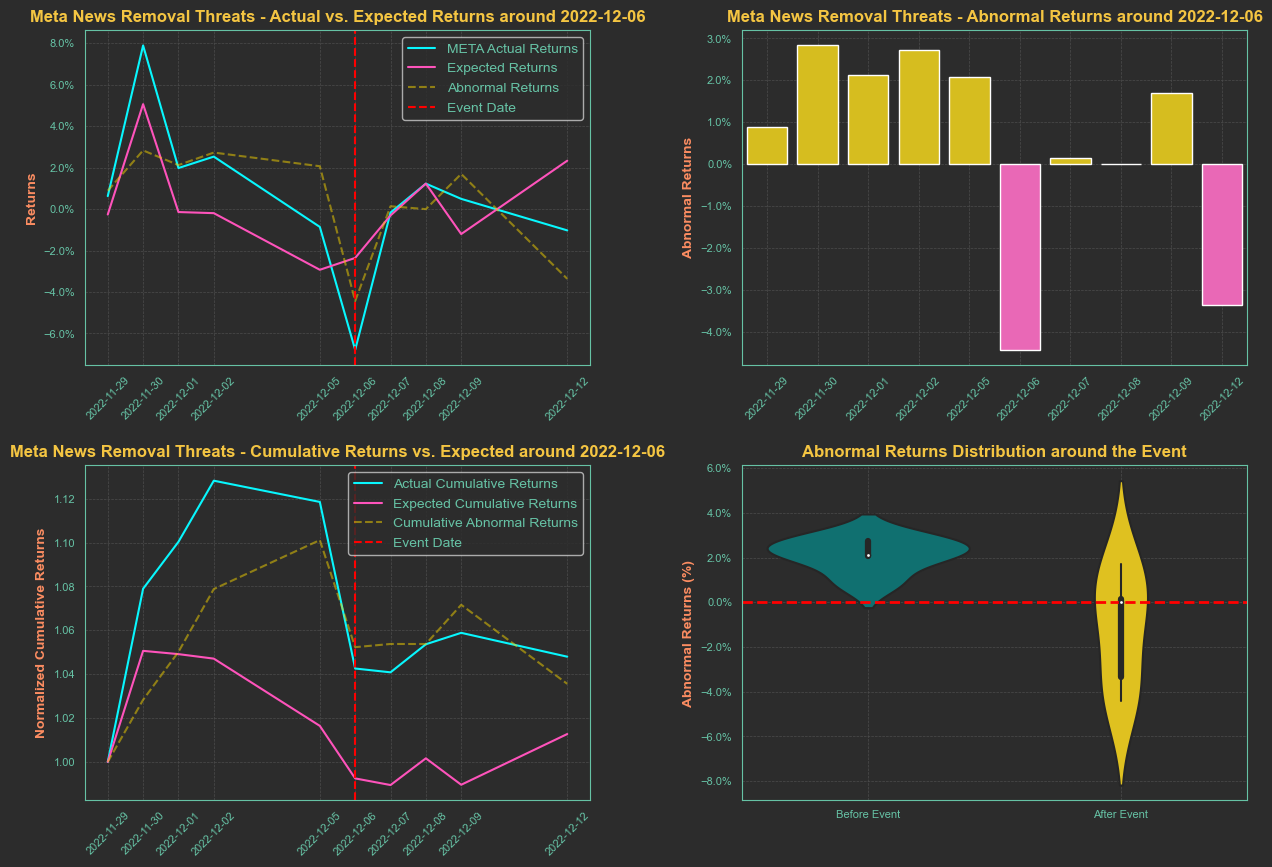

In [5]:
meta_events = [
    {"event": "Meta News Removal Threats", "date": "2022-12-06"}
]
for event in meta_events:
    analyzer.analyze_event(event)


### Event (d): News removal threat
Meta's news removal threat coincides with a 4.67% cumulative abnormal return (CAR) and a 0.47% average abnormal return (AAR). The significant T-stat for CAR at 2.320 suggests that the event window was associated with a positive market reaction. However, the abnormal returns were almost entirely concentrated on the event window prior to the event day, suggesting either anticipation, or that another event may be driving the positive market reaction due to the limitations of our event study methodology.


### Event Analysis

| Metric | Value |
| --- | --- |
| **Event** | Facebook rebranded as Meta |
| **Base Stock** | META |
| **Market** | ^GSPC |
| **Date** | 2021-10-28 |
| **Beta** | 1.37 |
| **Estimation Window** | 90 days before/after event |
| **Event Window** | 5 days before/after event |
| **Observations** | 10 trading days |

### Returns
| Metric | Value |
| --- | --- |
| **Cumulative AR** | -6.17% |
| **Average AR** | -0.62% |

### Hypothesis Testing
| Metric | Value |
| --- | --- |
| **Significance Level** | 0.05 |
| **Degrees of Freedom** | 9 |
| **Critical T-value** | 1.976 |
| **T-stat for AAR** | -1.056 |
| **T-stat for CAR** | -3.338 |
| **SD of AAR, CAR** | 0.0058, 0.0185 |

### Significance
| Metric | Value |
| --- | --- |
| **Is T-stat for AR significant?** | No |
| **Is T-stat for CAR significant?** | Yes |
| **Is CAR positive?** | No |
| **Is AAR positive?** | No |

### Expected, Actual, and Abnormal Returns

| Date | Expected Return | Actual Return | Abnormal Return |
| --- | --- | --- | --- |
| 2021-10-21 | 0.41% | 0.32% | -0.09% |
| 2021-10-22 | -0.15% | -5.05% | -4.90% |
| 2021-10-25 | 0.65% | 1.26% | 0.60% |
| 2021-10-26 | 0.25% | -3.92% | -4.17% |
| 2021-10-27 | -0.69% | -1.14% | -0.44% |
| 2021-10-28 | 1.35% | 1.51% | 0.15% |
| 2021-10-29 | 0.27% | 2.10% | 1.83% |
| 2021-11-01 | 0.25% | 1.98% | 1.73% |
| 2021-11-02 | 0.51% | -0.58% | -1.08% |
| 2021-11-03 | 0.89% | 1.08% | 0.19% |


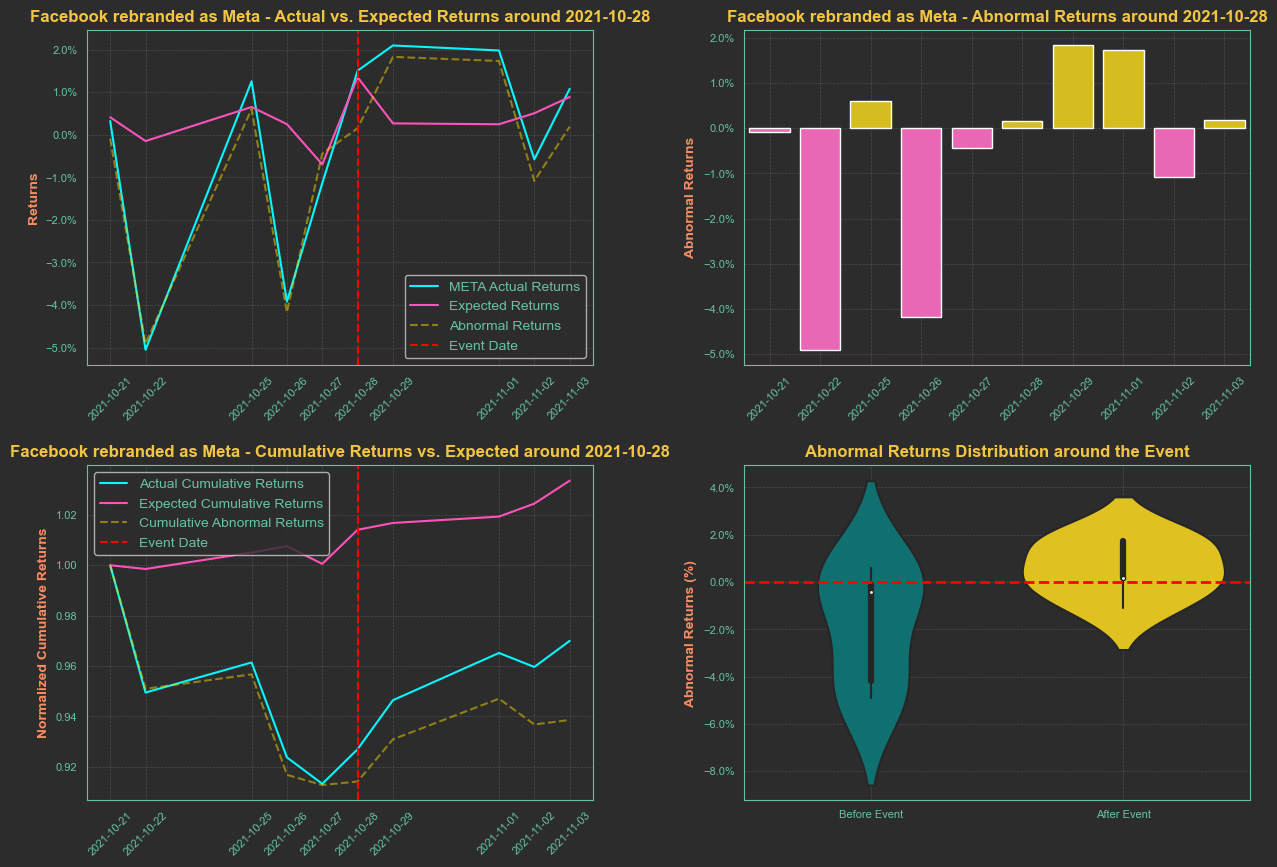

In [6]:
meta_events = [
    {"event": "Facebook rebranded as Meta", "date": "2021-10-28"}
]
for event in meta_events:
    analyzer.analyze_event(event)


### Event (e): Rebranding to Meta Platforms
Event (e): The rebranding of Facebook to Meta Platforms was met with significantly negative cumulative returns of -6.17% around the event, with an average abnormal return (AAR) of -0.62%. The significant T-stat for CAR at -3.338 indicates a significant market event was happening in this window. Despite the negative sentiment prior to the announcement, the subsequent days showed positive abnormal returns, suggesting that the events leading up to the rebranding had investors in a mood of skepticism, but this later adjusted to the potential strategic benefits of the new brand identity it seems.


### B. Events Involving Mark Zuckerberg

Three events involving Mark Zuckerberg as an individual are identified for the event study:
- Event 1: Mark Zuckerberg's Congressional Testimony  
    - (2018-04-10)
- Event 2: Meets with Pope Francis                    
    - (2016-08-29)
- Event 3: Mark Zuckerberg on Joe Rogan Experience   
    - (2022-08-25)


### Event Analysis

| Metric | Value |
| --- | --- |
| **Event** | Zuckerberg's Testimony Before Congress |
| **Base Stock** | META |
| **Market** | ^GSPC |
| **Date** | 2018-04-10 |
| **Beta** | 1.21 |
| **Estimation Window** | 90 days before/after event |
| **Event Window** | 5 days before/after event |
| **Observations** | 10 trading days |

### Returns
| Metric | Value |
| --- | --- |
| **Cumulative AR** | 1.58% |
| **Average AR** | 0.16% |

### Hypothesis Testing
| Metric | Value |
| --- | --- |
| **Significance Level** | 0.05 |
| **Degrees of Freedom** | 9 |
| **Critical T-value** | 1.977 |
| **T-stat for AAR** | 0.370 |
| **T-stat for CAR** | 1.171 |
| **SD of AAR, CAR** | 0.0043, 0.0135 |

### Significance
| Metric | Value |
| --- | --- |
| **Is T-stat for AR significant?** | No |
| **Is T-stat for CAR significant?** | No |
| **Is CAR positive?** | Yes |
| **Is AAR positive?** | Yes |

### Expected, Actual, and Abnormal Returns

| Date | Expected Return | Actual Return | Abnormal Return |
| --- | --- | --- | --- |
| 2018-04-03 | 1.52% | 0.46% | -1.06% |
| 2018-04-04 | 1.40% | -0.65% | -2.04% |
| 2018-04-05 | 0.83% | 2.73% | 1.91% |
| 2018-04-06 | -2.65% | -1.34% | 1.30% |
| 2018-04-09 | 0.40% | 0.46% | 0.06% |
| 2018-04-10 | 2.02% | 4.50% | 2.48% |
| 2018-04-11 | -0.67% | 0.78% | 1.44% |
| 2018-04-12 | 1.00% | -1.47% | -2.47% |
| 2018-04-13 | -0.35% | 0.40% | 0.75% |
| 2018-04-16 | 0.98% | 0.19% | -0.79% |


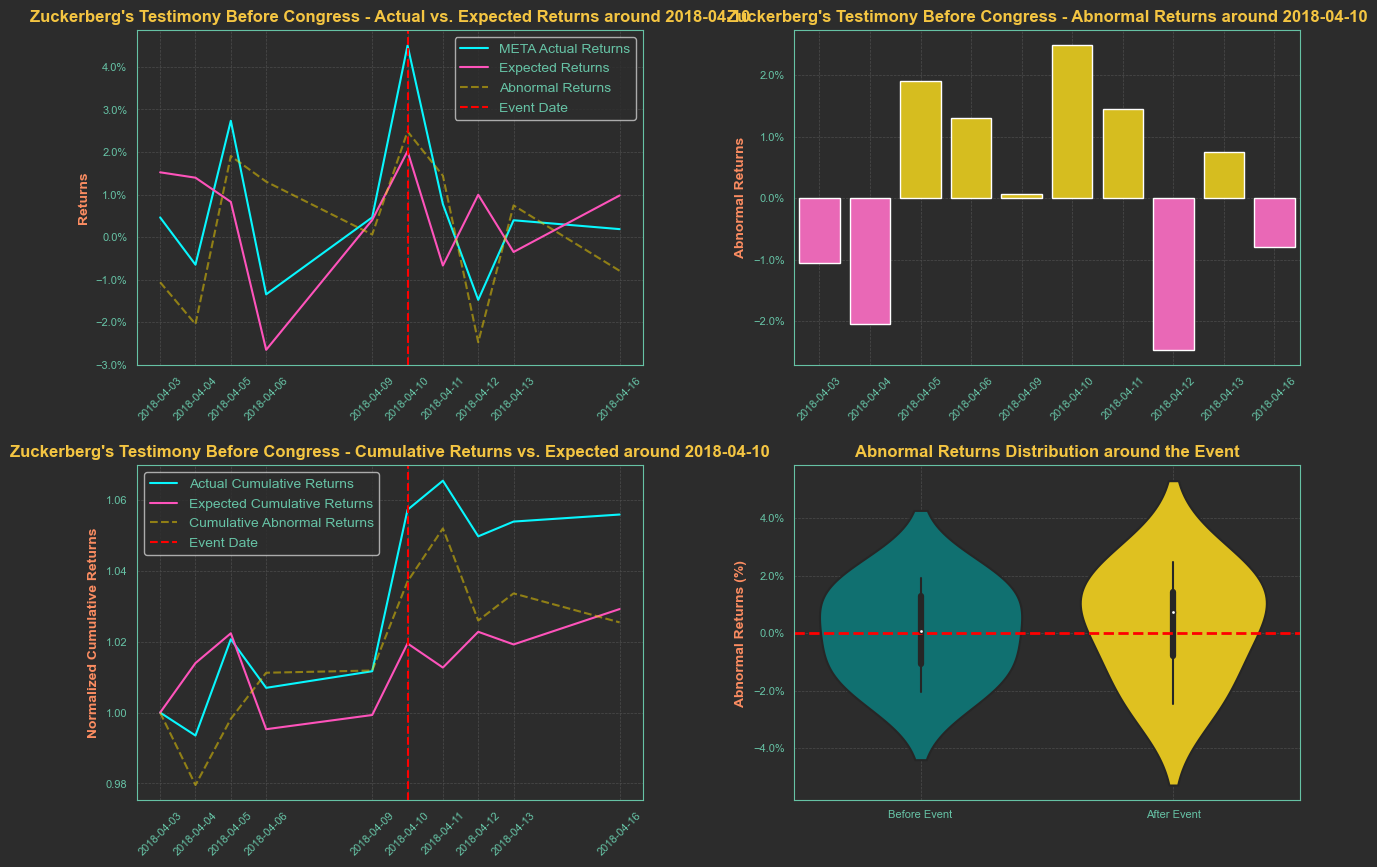

In [7]:
meta_events = [
    {"event": "Zuckerberg's Testimony Before Congress", "date": "2018-04-10"}
]
for event in meta_events:
    analyzer.analyze_event(event)


1. **Zuckerberg's Testimony Before Congress (2018-04-10)**: 
Zuckerberg's testimony before Congress on April 10, 2018, led to a slight increase in Meta's stock, reflected in a cumulative abnormal return (CAR) of 1.58% and an average abnormal return (AAR) of 0.16%. Despite these positive returns, the T-statistics for both AAR and CAR were not significant, indicating a muted market reaction. This suggests that while the testimony, highlighting concerns over data privacy and potential regulation was likely important, it did not significantly alter investor sentiment or expectations in the short term. The event was a publicised moment for the company, but its immediate financial impact was limited.


### Event Analysis

| Metric | Value |
| --- | --- |
| **Event** | Zuckerberg Meets with Pope |
| **Base Stock** | META |
| **Market** | ^GSPC |
| **Date** | 2016-08-29 |
| **Beta** | 1.08 |
| **Estimation Window** | 90 days before/after event |
| **Event Window** | 5 days before/after event |
| **Observations** | 10 trading days |

### Returns
| Metric | Value |
| --- | --- |
| **Cumulative AR** | 2.57% |
| **Average AR** | 0.26% |

### Hypothesis Testing
| Metric | Value |
| --- | --- |
| **Significance Level** | 0.05 |
| **Degrees of Freedom** | 9 |
| **Critical T-value** | 1.977 |
| **T-stat for AAR** | 1.946 |
| **T-stat for CAR** | 6.153 |
| **SD of AAR, CAR** | 0.0013, 0.0042 |

### Significance
| Metric | Value |
| --- | --- |
| **Is T-stat for AR significant?** | No |
| **Is T-stat for CAR significant?** | Yes |
| **Is CAR positive?** | Yes |
| **Is AAR positive?** | Yes |

### Expected, Actual, and Abnormal Returns

| Date | Expected Return | Actual Return | Abnormal Return |
| --- | --- | --- | --- |
| 2016-08-22 | -0.06% | 0.48% | 0.54% |
| 2016-08-23 | 0.21% | 0.18% | -0.03% |
| 2016-08-24 | -0.57% | -0.72% | -0.15% |
| 2016-08-25 | -0.15% | 0.33% | 0.48% |
| 2016-08-26 | -0.17% | 0.86% | 1.03% |
| 2016-08-29 | 0.56% | 1.26% | 0.70% |
| 2016-08-30 | -0.21% | -0.55% | -0.34% |
| 2016-08-31 | -0.26% | 0.22% | 0.48% |
| 2016-09-01 | -0.00% | 0.04% | 0.04% |
| 2016-09-02 | 0.45% | 0.27% | -0.18% |


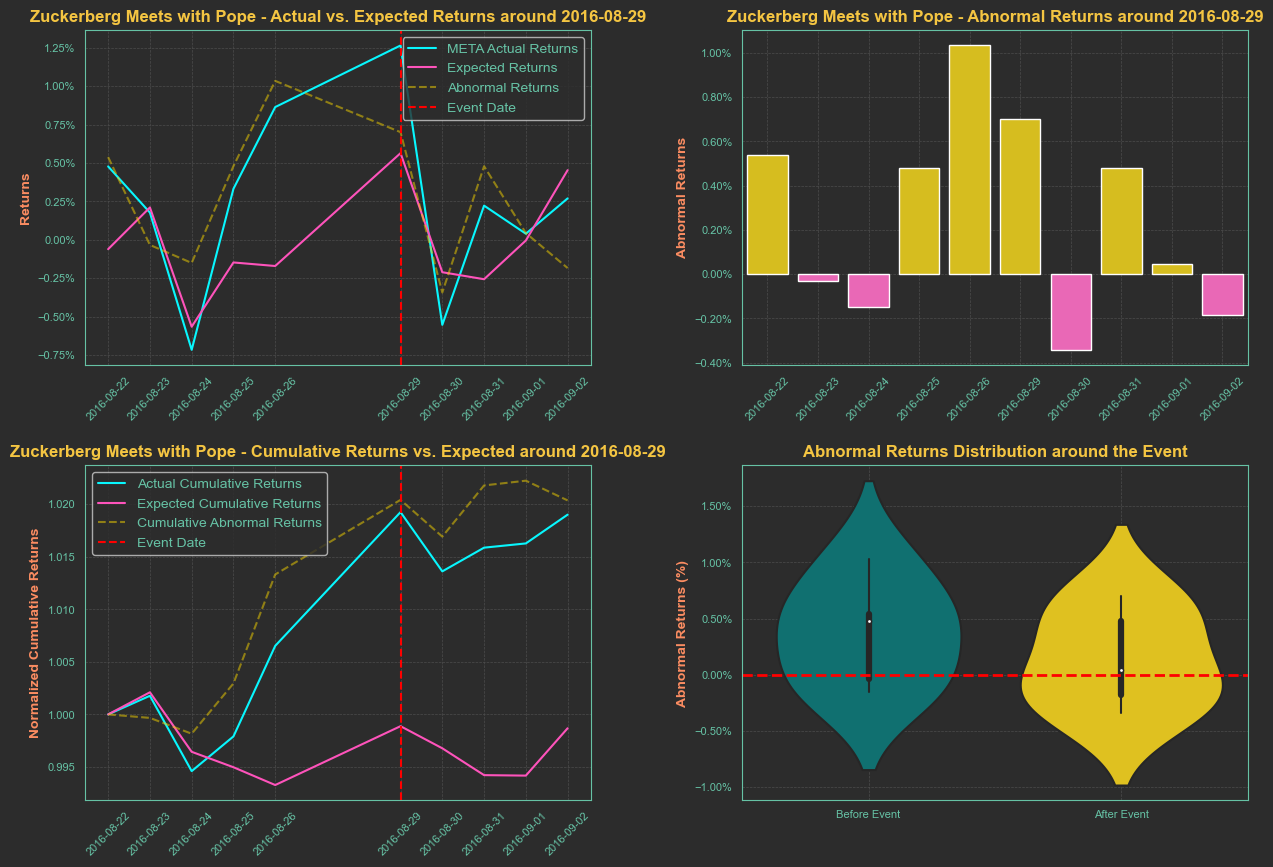

In [8]:
meta_events = [
    {"event": "Zuckerberg Meets with Pope", "date": "2016-08-29"}
]
for event in meta_events:
    analyzer.analyze_event(event)


2. **Zuckerberg Meets with Pope (2016-08-29)**: 
- Zuckerberg's meeting with the Pope on August 29, 2016, is associated with a 2.57% positive cumulative abnormal return (CAR) over the event window and a modest average abnormal return (AAR) of 0.26%. Despite the high T-stat for CAR at 6.153, which indicates a statistically significant positive effect, the meeting itself seemingly had a negligible direct impact on Meta's stock price. The positive returns observed leading up to the event may be attributed to Zuckerberg's travels and engagements during that period, which could have been viewed positively by investors as efforts to enhance Meta's global image and social responsibility initiatives.


### Event Analysis

| Metric | Value |
| --- | --- |
| **Event** | Zuckerberg on Joe Rogan's Podcast |
| **Base Stock** | META |
| **Market** | ^GSPC |
| **Date** | 2022-08-25 |
| **Beta** | 1.84 |
| **Estimation Window** | 90 days before/after event |
| **Event Window** | 5 days before/after event |
| **Observations** | 10 trading days |

### Returns
| Metric | Value |
| --- | --- |
| **Cumulative AR** | 7.41% |
| **Average AR** | 0.74% |

### Hypothesis Testing
| Metric | Value |
| --- | --- |
| **Significance Level** | 0.05 |
| **Degrees of Freedom** | 9 |
| **Critical T-value** | 1.977 |
| **T-stat for AAR** | 1.467 |
| **T-stat for CAR** | 4.639 |
| **SD of AAR, CAR** | 0.0050, 0.0160 |

### Significance
| Metric | Value |
| --- | --- |
| **Is T-stat for AR significant?** | No |
| **Is T-stat for CAR significant?** | Yes |
| **Is CAR positive?** | Yes |
| **Is AAR positive?** | Yes |

### Expected, Actual, and Abnormal Returns

| Date | Expected Return | Actual Return | Abnormal Return |
| --- | --- | --- | --- |
| 2022-08-18 | 0.42% | -0.11% | -0.53% |
| 2022-08-19 | -2.38% | -3.84% | -1.46% |
| 2022-08-22 | -3.95% | -2.92% | 1.02% |
| 2022-08-23 | -0.41% | -1.19% | -0.78% |
| 2022-08-24 | 0.54% | 1.33% | 0.80% |
| 2022-08-25 | 2.60% | 3.38% | 0.78% |
| 2022-08-26 | -6.21% | -4.15% | 2.06% |
| 2022-08-29 | -1.23% | -1.61% | -0.38% |
| 2022-08-30 | -2.03% | -1.26% | 0.77% |
| 2022-08-31 | -1.44% | 3.67% | 5.11% |


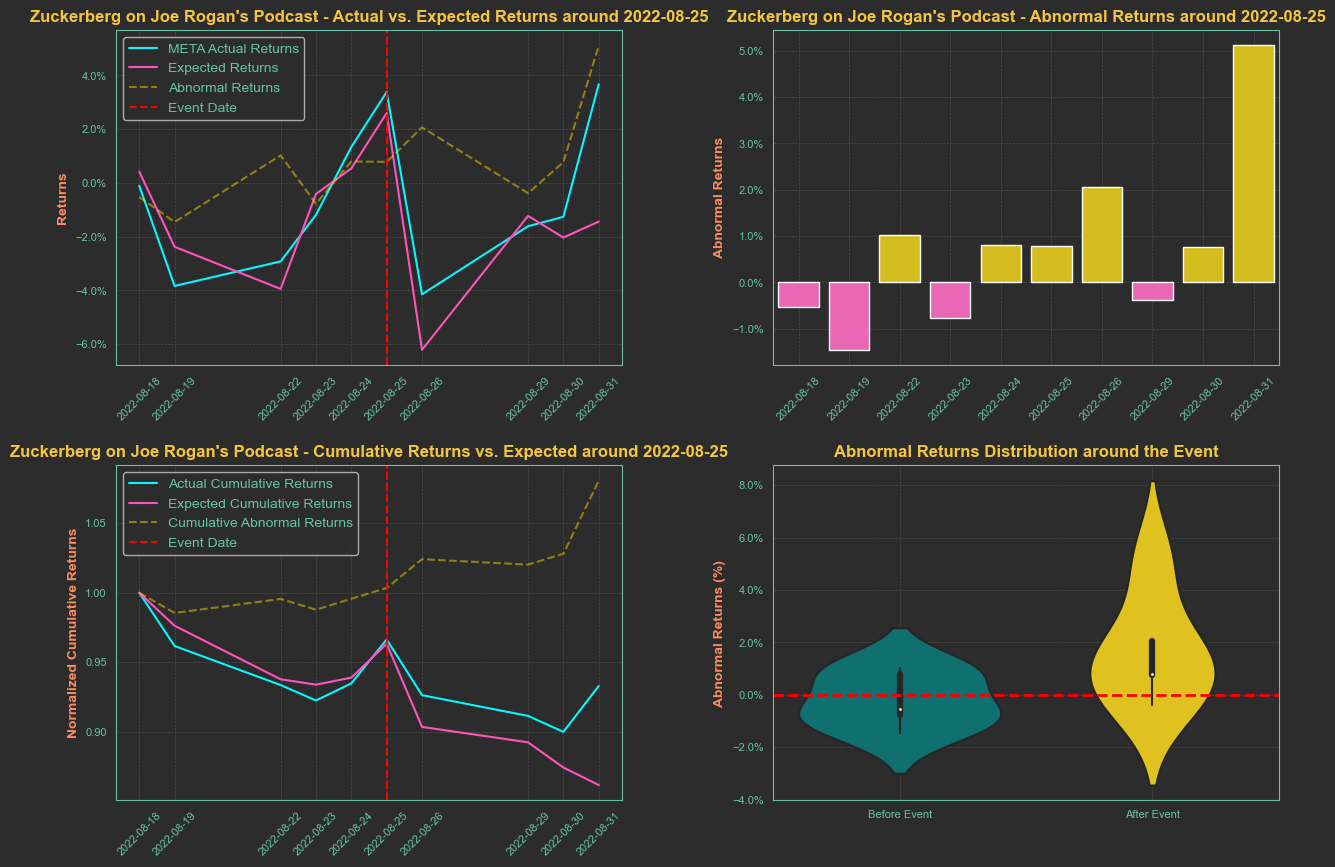

In [9]:
meta_events = [
    {"event": "Zuckerberg on Joe Rogan's Podcast", "date": "2022-08-25"}
]
for event in meta_events:
    analyzer.analyze_event(event)


3. **Zuckerberg on Joe Rogan's Podcast (2022-08-25)**: 
- Zuckerberg's appearance on Joe Rogan's Podcast on August 25, 2022, correlates with a notable 7.41% cumulative abnormal return (CAR) and a 0.74% average abnormal return (AAR). The significant T-stat for CAR at 4.639 suggests that the market responded positively to Zuckerberg's long-form portrayal and discussions about Meta's future plans and challenges. This appears to have been a positive event for Meta's stock price.



## Conclusion

As we can see, this methodology can provide insights into how specific events and leadership activities can influence investor behavior and stock performance. The event study methodology, though very limited, can offer a structured approach to understanding the market's reaction to new information. However, it is important to note that the methodology is especially limited when events are close together in time.

# Part 2
## Analysis of Amazon's Acquisition of iRobot

### A. Merger Agreement Review
- **Date:** August 5, 2022
- **Details:** Amazon (AMZN) announces agreement to buy iRobot (IRBT) for $61 per share.
- **Previous Price of IRBT:** $49.99 per share.
- **Merger Agreement:** [SEC Filing](https://www.sec.gov/Archives/edgar/data/1159167/000119312522213174/d389581d8k.htm)
- **Section 4.1 Analysis:**
  - The offer is in (cash/stock; based on Section 4.1 review):
  
      >"As a result of the Merger, each share of common stock of the Company, par value $0.01 per share ('Common Stock'), outstanding immediately prior to the effective time of the Merger (the 'Effective Time') [...] will, at the Effective Time, automatically be cancelled and converted into the right to receive $61.00 in cash (the 'Merger Consideration'), without interest and subject to applicable withholding taxes."

**Answer**: 
- From the above quote, we can see that the offer is in Cash.




### B. Equity Cost of Capital (rE) of IRBT
- **Method:** CAPM
- **Data Period:** September 2017 - August 2022
- **Formula:** 
  $$
  r_E = r_F + \beta \times (r_M - r_F)
  $$
  where $r_F$ is the risk-free rate, $\beta$ is the beta of IRBT, and $r_M$ is the market expected return.
- **Assumptions:**
  - Market expected return $r_M$: 10%
  - Risk-free rate $r_F$: 3.33%


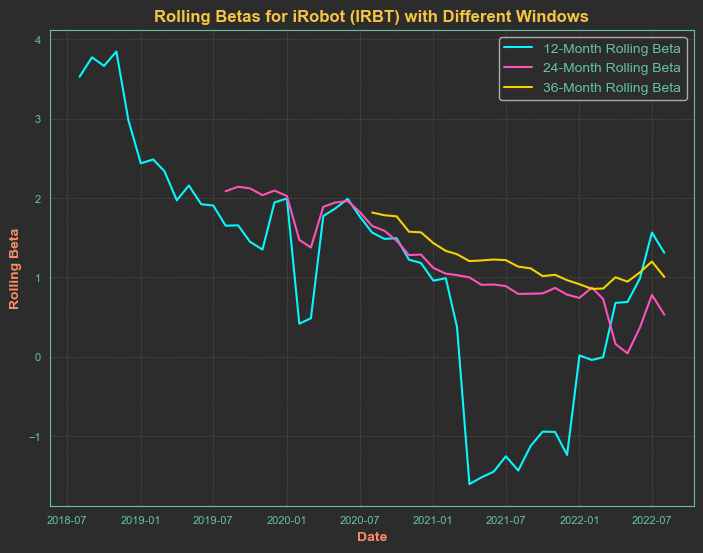


| Metric                     | Value          |
|----------------------------|----------------|
| **Beta (IRBT)**            | 1.3212     |
| **Market Expected Return** | 10.95% |
| **Risk-Free Rate**         | 2.72% |
| **Equity Cost of Capital** | 13.60% |



### Given Assumptions

| Assumption                     | Value                   |
|--------------------------------|-------------------------|
| 5 Year Raw Beta                | 0.88        |
| Market Return                  | 10.00%    |
| Risk-Free Rate                 | 3.33%   |
| Equity Cost of Capital (IRBT) | 9.18% |


In [10]:
# Define the ticker symbols
ticker_symbol = "IRBT"
market_index_symbol = "^GSPC"  # S&P 500 as a proxy for the market

# Define the start and end dates for the historical data
start_date = "2017-08-01"  # Going back a month further to start returns in September
end_date = "2022-08-31"

# Download historical data for iRobot and the market index (S&P 500)
irbt_data = yf.download(ticker_symbol, start=start_date, end=end_date, progress=False, interval='1mo')
market_data = yf.download(market_index_symbol, start=start_date, end=end_date, progress=False, interval='1mo')

# Calculate monthly returns
irbt_monthly_returns = irbt_data['Adj Close'].pct_change().dropna()
market_monthly_returns = market_data['Adj Close'].pct_change().dropna()

# Calculate beta
covariance = np.cov(irbt_monthly_returns, market_monthly_returns)[0, 1]
market_variance = np.var(market_monthly_returns)
beta = covariance / market_variance

# Get the 3-year T-Bill rate from FRED as the risk-free rate
risk_free_rate = pdr.get_data_fred('GS3M', start_date, end_date)
risk_free_rate = risk_free_rate.iloc[-1]['GS3M'] / 100  # Extract the rate value and convert to decimal
market_return = market_monthly_returns.mean() * 12  # Annualize the market return

# Calculate equity cost of capital using CAPM
equity_cost_of_capital = risk_free_rate + beta * (market_return - risk_free_rate)

# Calculate rolling betas for different windows
rolling_beta_12 = irbt_monthly_returns.rolling(window=12).cov(market_monthly_returns) / market_monthly_returns.rolling(window=12).var()
rolling_beta_24 = irbt_monthly_returns.rolling(window=24).cov(market_monthly_returns) / market_monthly_returns.rolling(window=24).var()
rolling_beta_36 = irbt_monthly_returns.rolling(window=36).cov(market_monthly_returns) / market_monthly_returns.rolling(window=36).var()
rolling_beta_12 = rolling_beta_12.dropna()
rolling_beta_24 = rolling_beta_24.dropna()
rolling_beta_36 = rolling_beta_36.dropna()

# Plot the rolling betas for different windows on the same graph
plt.figure(figsize=(8.3, 6.18), facecolor='#2c2c2c')
plt.plot(rolling_beta_12.index, rolling_beta_12.values, label='12-Month Rolling Beta')
plt.plot(rolling_beta_24.index, rolling_beta_24.values, label='24-Month Rolling Beta')
plt.plot(rolling_beta_36.index, rolling_beta_36.values, label='36-Month Rolling Beta')
plt.xlabel('Date')
plt.ylabel('Rolling Beta')
plt.title('Rolling Betas for iRobot (IRBT) with Different Windows')
style_plot(plt.gca(), 'Rolling Betas for iRobot (IRBT) with Different Windows', ylabel='Rolling Beta')
plt.legend()
plt.grid(True)
plt.show()

# Displaying the information in a markdown table format
markdown_table = f"""
| Metric                     | Value          |
|----------------------------|----------------|
| **Beta (IRBT)**            | {beta:.4f}     |
| **Market Expected Return** | {market_return:.2%} |
| **Risk-Free Rate**         | {risk_free_rate:.2%} |
| **Equity Cost of Capital** | {equity_cost_of_capital:.2%} |
"""

display(Markdown(markdown_table))

# Given assumptions
given_beta = 0.877242 # 5-year raw beta
market_return = 0.10  # Market expected return of 10%
risk_free_rate = 0.0333  # Risk-free rate of 3.33%

# Calculate equity cost of capital using CAPM
Assumed_equity_cost_of_capital = risk_free_rate + given_beta * (market_return - risk_free_rate)


table = f"""
### Given Assumptions

| Assumption                     | Value                   |
|--------------------------------|-------------------------|
| 5 Year Raw Beta                | {given_beta:.2f}        |
| Market Return                  | {market_return:.2%}    |
| Risk-Free Rate                 | {risk_free_rate:.2%}   |
| Equity Cost of Capital (IRBT) | {Assumed_equity_cost_of_capital:.2%} |
"""

# Display the table
display(Markdown(table))


- Here are are using multiple versions of $\beta$ for IRBT, because we are given assumptions, but can easily derive our own $\beta$ using the CAPM formula -- additionally, we later add a beta from FactSet to compare.

- I also computed a rolling beta for IRBT, just to show that there is a signficant amount of volatility in the beta over the short terms that will not be captured by the 5 year, or 3 year. For pricing, this may be an important note. However, due to the limited scope of this study, I will not be using the rolling beta or short beta for any further analysis.

### C. Weighted Average Cost of Capital (WACC) of IRBT
- **Formula:** 
  $$
  WACC = w_d \times r_d \times (1 - Tc) + w_e \times r_E
  $$
  where $w_d$ and $w_e$ are the weights of debt and equity, $r_d$ is the cost of debt, and $Tc$ is the corporate tax rate.

In [11]:
## Assuming use of current WACC
Fully_Diluted_Mkt_Cap = 1117.6
TotalCap = 1322
w_E = Fully_Diluted_Mkt_Cap / TotalCap
w_D = 1 - w_E

CoD = 0.0578

# Calculating WACC
WACC = w_E * equity_cost_of_capital + w_D * CoD
Assumed_WACC = w_E * Assumed_equity_cost_of_capital + w_D * CoD

display(Markdown(f"""
### Calculating WACC
                 
| Assumption                     | Value                   |
|--------------------------------|-------------------------|
| WACC (IRBT)                    | {WACC:.2%}        |
| Assumed WACC (IRBT)            | {Assumed_WACC:.2%}        |
"""))



### Calculating WACC
                 
| Assumption                     | Value                   |
|--------------------------------|-------------------------|
| WACC (IRBT)                    | 12.39%        |
| Assumed WACC (IRBT)            | 8.66%        |


### D. Present Value of Future Free Cash Flows (FCF)
- **Estimates for FCF:** December 2023, 2024, 2025
- **Perpetual Growth Rate (g):** Between 3.5% and 4.5%
- **Formula:**
  $$
  PV = \sum \frac{FCF_t}{(1 + r)^t} + \frac{FCF_{T+1}}{(r - g)}
  $$
  where $r$ is the discount rate, and $T$ is the last forecasted year.
- **Implied Price Per Share Calculation:**
  - Subtract net debt and divide by outstanding shares.
- **Sensitivity Analysis:**
  - Variations in $g$ and its effect on the price per share.

In [12]:
# Constants
current_net_debt = -79.3
Shares_Outstanding = 27.865605
growth_rates = [0.035, 0.045]
discount_rates = [("Calculated", WACC), ("Assumed", Assumed_WACC), ('FactSet', 7.66/100)]
growth_rate = 0.05

fcf_data = {
    'Year': ['Dec 14', 'Dec 15', 'Dec 16', 'Dec 17', 'Dec 18', 'Dec 19', 'Dec 20', 'Dec 21', 'Dec 22'],
    'Free Cash Flow': [23.4, 13.5, 106.0, -91.0, 41.0, 104.0, 226.0, -45.0, -102.0]
}
results = []

# Create a table to store all FCFs and estimates
fcf_table = pd.DataFrame({
    'Year': [],
    'Free Cash Flow': [],
    'Estimated FCF (Calculated)': [],
    'Estimated FCF (Assumed)': [],
})

# Create a DataFrame for FCF data
df = pd.DataFrame(fcf_data)

# Filter the DataFrame to get the most recent two years of positive cash flow
recent_positive_fcf = df[df['Free Cash Flow'] > 0].tail(2)

# Grow the most recent two years of positive cash flow at the provided growth rate
recent_positive_fcf['Estimated FCF'] = recent_positive_fcf['Free Cash Flow'] * (1 + growth_rate)

# Get the annual estimates for Free Cash Flow (FCF) for Dec 2023, 2024, and 2025
average_recent_fcf = recent_positive_fcf['Estimated FCF'].mean()
future_years = ['Dec 23', 'Dec 24', 'Dec 25']
future_fcf_estimates = {year: average_recent_fcf * (1 + growth_rate) ** i for i, year in enumerate(future_years)}

# Define a function to calculate present value estimates
def calculate_present_value_estimates(future_fcf_estimates, discount_rate):
    return {
        year: future_fcf_estimates[year] / (1 + discount_rate) ** (i + 1)
        for i, year in enumerate(future_years)
    }

# Calculate present value estimates using Assumed_WACC and WACC
pv_estimated_fcf_Assumed = calculate_present_value_estimates(future_fcf_estimates, Assumed_WACC)
pv_estimated_fcf_Calculated = calculate_present_value_estimates(future_fcf_estimates, WACC)
pv_estimated_fcF_FactSet = calculate_present_value_estimates(future_fcf_estimates, 7.66/100)

# Create the DataFrame with the correct values for each column
results_df = pd.DataFrame({
    'Year': fcf_data['Year'] + [year + "E" for year in future_years],
    'Historical FCF': fcf_data['Free Cash Flow'] + ['-'] * len(future_years),
    'Estimated FCF': ['-'] * len(fcf_data['Year']) + [future_fcf_estimates[year] for year in future_years],
    'PV FCF (Assumed WACC)': ['-'] * len(fcf_data['Year']) + [pv_estimated_fcf_Assumed[year] for year in future_years],
    'PV FCF (Calculated WACC)': ['-'] * len(fcf_data['Year']) + [pv_estimated_fcf_Calculated[year] for year in future_years],
    'PV FCF (FactSet)': ['-'] * len(fcf_data['Year']) + [pv_estimated_fcF_FactSet[year] for year in future_years],
})
differences = pd.DataFrame(columns=['Discount Rate', 'Sensitivity to 100 bps move in g'])

for discount_rate_name, discount_rate in discount_rates:
    temp_results = []  # Temporary list to store results for each discount rate
    for g in growth_rates:
        # Calculate the PV of the FCFs leading up to the perpetual
        pv_fcf = sum(future_fcf_estimates[year] / (1 + discount_rate) ** (i + 1) for i, year in enumerate(future_years))

        # Given parameters for Terminal Value calculation
        fcf_2025 = future_fcf_estimates['Dec 25']

        # Terminal Value using the provided growth rate
        tv = fcf_2025 * (1 + g) / (discount_rate - g)

        # Present Value of Terminal Value using the provided discount rate
        pv_tv = tv / (1 + discount_rate) ** 4

        # Calculate the Enterprise Value (EV)
        EV = pv_fcf + pv_tv - current_net_debt

        # Calculate Implied Share Price
        Implied_Share_Price = EV / Shares_Outstanding

        results.append((g, discount_rate_name, discount_rate, pv_fcf, pv_tv, EV, Implied_Share_Price))
        temp_results.append(Implied_Share_Price)
    # calculate difference in implied share price per growth rate
    difference = temp_results[1] - temp_results[0]
    differences = pd.concat([differences, pd.DataFrame({'Discount Rate': [discount_rate_name], 'Sensitivity to 100 bps move in g': [difference]})], ignore_index=True)

# Create the Markdown table for results
markdown_table = """
### Results Table

| Growth Rate | Discount Rate Type | Discount Rate | PV of FCFs Leading to Perpetual | PV of TV | Enterprise Value (EV) | Implied Share Price |
|-------------|---------------------|---------------|----------------------------------|----------|-------------------------|----------------------|
"""

for result in results:
    g, discount_rate_name, discount_rate, pv_fcf, pv_tv, EV, Implied_Share_Price = result
    markdown_table += f"| {g} | {discount_rate_name} | {discount_rate:.2%} | {pv_fcf:.2f} | {pv_tv:.2f} | {EV:.2f} | {Implied_Share_Price:.2f} |\n"
                 
# Create the Markdown table for FCFs and estimates
fcf_table_markdown = """
### FCFs and Estimates Table

"""


# Display the Markdown tables
display(Markdown(markdown_table))

#
display(Markdown(differences.to_markdown(index=False)))
# Format all values in the DataFrame to have two decimal places
formatted_results_df = results_df.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)

# Display the formatted DataFrame as a Markdown table
display(Markdown(formatted_results_df.to_markdown(index=False)))
# Adjusting the function to use the same calculation method for both parts



### Results Table

| Growth Rate | Discount Rate Type | Discount Rate | PV of FCFs Leading to Perpetual | PV of TV | Enterprise Value (EV) | Implied Share Price |
|-------------|---------------------|---------------|----------------------------------|----------|-------------------------|----------------------|
| 0.035 | Calculated | 12.39% | 432.72 | 1393.93 | 1905.95 | 68.40 |
| 0.045 | Calculated | 12.39% | 432.72 | 1585.80 | 2097.82 | 75.28 |
| 0.035 | Assumed | 8.66% | 462.44 | 2751.26 | 3293.00 | 118.17 |
| 0.045 | Assumed | 8.66% | 462.44 | 3446.34 | 3988.08 | 143.12 |
| 0.035 | FactSet | 7.66% | 470.94 | 3537.38 | 4087.62 | 146.69 |
| 0.045 | FactSet | 7.66% | 470.94 | 4701.79 | 5252.03 | 188.48 |


| Discount Rate   |   Sensitivity to 100 bps move in g |
|:----------------|-----------------------------------:|
| Calculated      |                            6.88544 |
| Assumed         |                           24.9441  |
| FactSet         |                           41.7869  |

| Year    | Historical FCF   | Estimated FCF   | PV FCF (Assumed WACC)   | PV FCF (Calculated WACC)   | PV FCF (FactSet)   |
|:--------|:-----------------|:----------------|:------------------------|:---------------------------|:-------------------|
| Dec 14  | 23.40            | -               | -                       | -                          | -                  |
| Dec 15  | 13.50            | -               | -                       | -                          | -                  |
| Dec 16  | 106.00           | -               | -                       | -                          | -                  |
| Dec 17  | -91.00           | -               | -                       | -                          | -                  |
| Dec 18  | 41.00            | -               | -                       | -                          | -                  |
| Dec 19  | 104.00           | -               | -                       | -                          | -                  |
| Dec 20  | 226.00           | -               | -                       | -                          | -                  |
| Dec 21  | -45.00           | -               | -                       | -                          | -                  |
| Dec 22  | -102.00          | -               | -                       | -                          | -                  |
| Dec 23E | -                | 173.25          | 159.45                  | 154.15                     | 160.92             |
| Dec 24E | -                | 181.91          | 154.09                  | 144.02                     | 156.95             |
| Dec 25E | -                | 191.01          | 148.90                  | 134.55                     | 153.07             |

### E. Self FCF Calculation
1. **Formula:**
   The Free Cash Flow (FCF) can be calculated using the following formula:
   $$
   \text{FCF} = \text{EBIT} \times (1 - Tc) + \text{Depreciation} - \text{Capital Expenditures - Change in Net Working Capital}
   $$
   Where:
   - $\text{EBIT}$ is earnings before interest and taxes.
   - $Tc$ is the tax rate.
   - $\text{Depreciation}$ represents depreciation and amortization.
   - $\text{Capital Expenditures}$ (CAPEX) refer to capital expenditures on assets.
   - $\text{Change in Net Working Capital}$ ($\Delta NWC$) is the change in net working capital.

2. Now, compute the Free Cash Flow (FCF) using the 2021 financial statements from scratch. You can use the formula:

3. Re-estimate the implied price per share using these FCF estimates.

In [13]:
# Manual FCF calculations
sales_data = [556.8, 616.8, 660.6, 883.9, 1092.6, 1214.0, 1430.4, 1565.0, 1183.4]
EBIT_2021, Depreciation_2021, Capital_Expenditures_2021, Income_Taxes_2021, Total_Current_Assets_2021, Total_Current_Liabilities_2021 = 10.09, 31.06, -29.93, -2.1, 789.53, 395.68
Total_Current_Assets_2020, Total_Current_Liabilities_2020 = 881.22, 307.57

# Calculate the average sales growth rate.
sales_growth_rates = [(sales_data[i+1] / sales_data[i]) - 1 for i in range(len(sales_data) - 1)]
average_sales_growth_rate = (1 + pd.Series(sales_growth_rates)).prod()**(1/len(sales_growth_rates)) - 1

# Calculate NOPAT for DEC '21
Tax_Rate_2021 = Income_Taxes_2021 / EBIT_2021 if EBIT_2021 else 0
NOPAT_2021 = EBIT_2021 * (1 - Tax_Rate_2021)

# Calculate FCF for DEC '21
Change_NWC_2021 = (Total_Current_Assets_2021 - Total_Current_Assets_2020) - (Total_Current_Liabilities_2021 - Total_Current_Liabilities_2020)
FCF_2021 = NOPAT_2021 + Depreciation_2021 - Capital_Expenditures_2021 - Change_NWC_2021

# Estimate FCF for 2022 to 2025 using the average sales growth rate
FCF_2022 = FCF_2021 * (1 + average_sales_growth_rate)
FCF_2023 = FCF_2022 * (1 + average_sales_growth_rate)
FCF_2024 = FCF_2023 * (1 + average_sales_growth_rate)
FCF_2025 = FCF_2024 * (1 + average_sales_growth_rate)

results = []
# Create the Markdown table for differences in implied share prices
differences = pd.DataFrame(columns=['Discount Rate', 'Sensitivity to 100 bps move in g'])



# Iterate through growth rates and discount rates
for discount_rate_name, discount_rate in discount_rates:
    temp_results = []  # Temporary list to store results for each discount rate
    for g in growth_rates:
        TV_2025 = FCF_2025 * (1 + g) / (discount_rate - g)

        # Calculate Present Value of Terminal Value and FCFs from 2022 to 2025 discounted back to 2022
        PV_TV_2025 = TV_2025 / ((1 + discount_rate) ** 4)
        PV_FCF_2022_to_2025 = [FCF / ((1 + discount_rate) ** i) for i, FCF in enumerate([FCF_2022, FCF_2023, FCF_2024, FCF_2025], start=1)]

        # Total Present Value of future FCFs including Terminal Value
        Total_PV_FCF = sum(PV_FCF_2022_to_2025) + PV_TV_2025

        Implied_Share_Price = (Total_PV_FCF - current_net_debt) / Shares_Outstanding

        # Store results for the current growth rate and discount rate
        results.append((g, discount_rate_name, discount_rate, PV_FCF_2022_to_2025[0], PV_TV_2025, Total_PV_FCF, Implied_Share_Price))
        temp_results.append(Implied_Share_Price)
    difference = temp_results[1] - temp_results[0]
    differences = pd.concat([differences, pd.DataFrame({'Discount Rate': [discount_rate_name], 'Sensitivity to 100 bps move in g': [difference]})], ignore_index=True)

# Create the Markdown table for results
markdown_table = """
### Results Table

| Growth Rate | Discount Rate Type | Discount Rate | PV of FCFs Leading to Perpetual | PV of TV | Enterprise Value (EV) | Implied Share Price |
|-------------|---------------------|---------------|----------------------------------|----------|-------------------------|----------------------|
"""

for result in results:
    g, discount_rate_name, discount_rate, pv_fcf, pv_tv, EV, Implied_Share_Price = result
    markdown_table += f"| {g} | {discount_rate_name} | {discount_rate:.2%} | {pv_fcf:.2f} | {pv_tv:.2f} | {EV:.2f} | {Implied_Share_Price:.2f} |\n"


# Create the Markdown table for FCFs and estimates
fcf_table_markdown = """
### FCFs and Estimates Table

"""

# Display the Markdown tables
display(Markdown(markdown_table))
display(Markdown(differences.to_markdown(index=False)))

# Display
display(Markdown(f"""
### (F) Analysis of Self-Calculated FCFs as compares to amazons offer.

- **Calculated FCFs**: The calculated Free Cash Flows (FCFs) are considerably higher than those provided by FactSet.
  
- **Implied Share Price**: Consequently, the Implied Share Price based on these FCFs is significantly greater than the current share price.
  
- **Rationale**: This outcome is consistent with the use of more extensive estimates and assumptions, particularly related to sales growth and continual growth rates.
    - Additionally, we are forecasting the many more variables, including the growth rate of sales, the tax rate, and the change in net working capital.
    - The Tax especially is tricky, as it is negative in the most recent years. As is the Net Debt.
                 
- As far as amazon is concerned, these calculations and assumptions are less accurate than the ones provided by my market analysis of what IRBT's Discount rate is.
    - The Rationale behind all the differences I think can be explained almost entirely by Growth Rate Assumptions. These are integral, but inaccurate assumptions. 
    - I think that If I were Amazon and valuing this company for purchase, I would use my own estimates of what the growth rate would be to Amazon as a company and start there. 

- All that being said, It seems like the most accurate representation of what Amazon was looking for, was a conservative fcf growth estimate and a calculated discount rate.                      
"""))


### Results Table

| Growth Rate | Discount Rate Type | Discount Rate | PV of FCFs Leading to Perpetual | PV of TV | Enterprise Value (EV) | Implied Share Price |
|-------------|---------------------|---------------|----------------------------------|----------|-------------------------|----------------------|
| 0.035 | Calculated | 12.39% | 247.34 | 2691.48 | 3648.23 | 133.77 |
| 0.045 | Calculated | 12.39% | 247.34 | 3061.95 | 4018.70 | 147.06 |
| 0.035 | Assumed | 8.66% | 255.84 | 5312.29 | 6353.11 | 230.84 |
| 0.045 | Assumed | 8.66% | 255.84 | 6654.40 | 7695.22 | 279.00 |
| 0.035 | FactSet | 7.66% | 258.20 | 6830.18 | 7895.41 | 286.18 |
| 0.045 | FactSet | 7.66% | 258.20 | 9078.50 | 10143.74 | 366.87 |


| Discount Rate   |   Sensitivity to 100 bps move in g |
|:----------------|-----------------------------------:|
| Calculated      |                            13.2948 |
| Assumed         |                            48.1636 |
| FactSet         |                            80.6845 |


### (F) Analysis of Self-Calculated FCFs as compares to amazons offer.

- **Calculated FCFs**: The calculated Free Cash Flows (FCFs) are considerably higher than those provided by FactSet.
  
- **Implied Share Price**: Consequently, the Implied Share Price based on these FCFs is significantly greater than the current share price.
  
- **Rationale**: This outcome is consistent with the use of more extensive estimates and assumptions, particularly related to sales growth and continual growth rates.
    - Additionally, we are forecasting the many more variables, including the growth rate of sales, the tax rate, and the change in net working capital.
    - The Tax especially is tricky, as it is negative in the most recent years. As is the Net Debt.
                 
- As far as amazon is concerned, these calculations and assumptions are less accurate than the ones provided by my market analysis of what IRBT's Discount rate is.
    - The Rationale behind all the differences I think can be explained almost entirely by Growth Rate Assumptions. These are integral, but inaccurate assumptions. 
    - I think that If I were Amazon and valuing this company for purchase, I would use my own estimates of what the growth rate would be to Amazon as a company and start there. 

- All that being said, It seems like the most accurate representation of what Amazon was looking for, was a conservative fcf growth estimate and a calculated discount rate.                      



### Event Analysis

| Metric | Value |
| --- | --- |
| **Event** | IRBT's AMZN Merge Announced |
| **Base Stock** | IRBT |
| **Market** | ^GSPC |
| **Date** | 2022-08-05 |
| **Beta** | 1.44 |
| **Estimation Window** | 90 days before/after event |
| **Event Window** | 5 days before/after event |
| **Observations** | 10 trading days |

### Returns
| Metric | Value |
| --- | --- |
| **Cumulative AR** | 24.05% |
| **Average AR** | 2.41% |

### Hypothesis Testing
| Metric | Value |
| --- | --- |
| **Significance Level** | 0.05 |
| **Degrees of Freedom** | 9 |
| **Critical T-value** | 1.977 |
| **T-stat for AAR** | 1.395 |
| **T-stat for CAR** | 4.411 |
| **SD of AAR, CAR** | 0.0172, 0.0545 |

### Significance
| Metric | Value |
| --- | --- |
| **Is T-stat for AR significant?** | No |
| **Is T-stat for CAR significant?** | Yes |
| **Is CAR positive?** | Yes |
| **Is AAR positive?** | Yes |

### Expected, Actual, and Abnormal Returns

| Date | Expected Return | Actual Return | Abnormal Return |
| --- | --- | --- | --- |
| 2022-07-29 | 2.04% | 0.50% | -1.54% |
| 2022-08-01 | -0.41% | 0.83% | 1.23% |
| 2022-08-02 | -0.96% | -0.71% | 0.25% |
| 2022-08-03 | 2.25% | 8.53% | 6.28% |
| 2022-08-04 | -0.11% | 0.00% | 0.11% |
| 2022-08-05 | -0.23% | 19.10% | 19.34% |
| 2022-08-08 | -0.18% | 0.13% | 0.31% |
| 2022-08-09 | -0.61% | 0.03% | 0.64% |
| 2022-08-10 | 3.06% | -0.07% | -3.13% |
| 2022-08-11 | -0.10% | 0.45% | 0.55% |


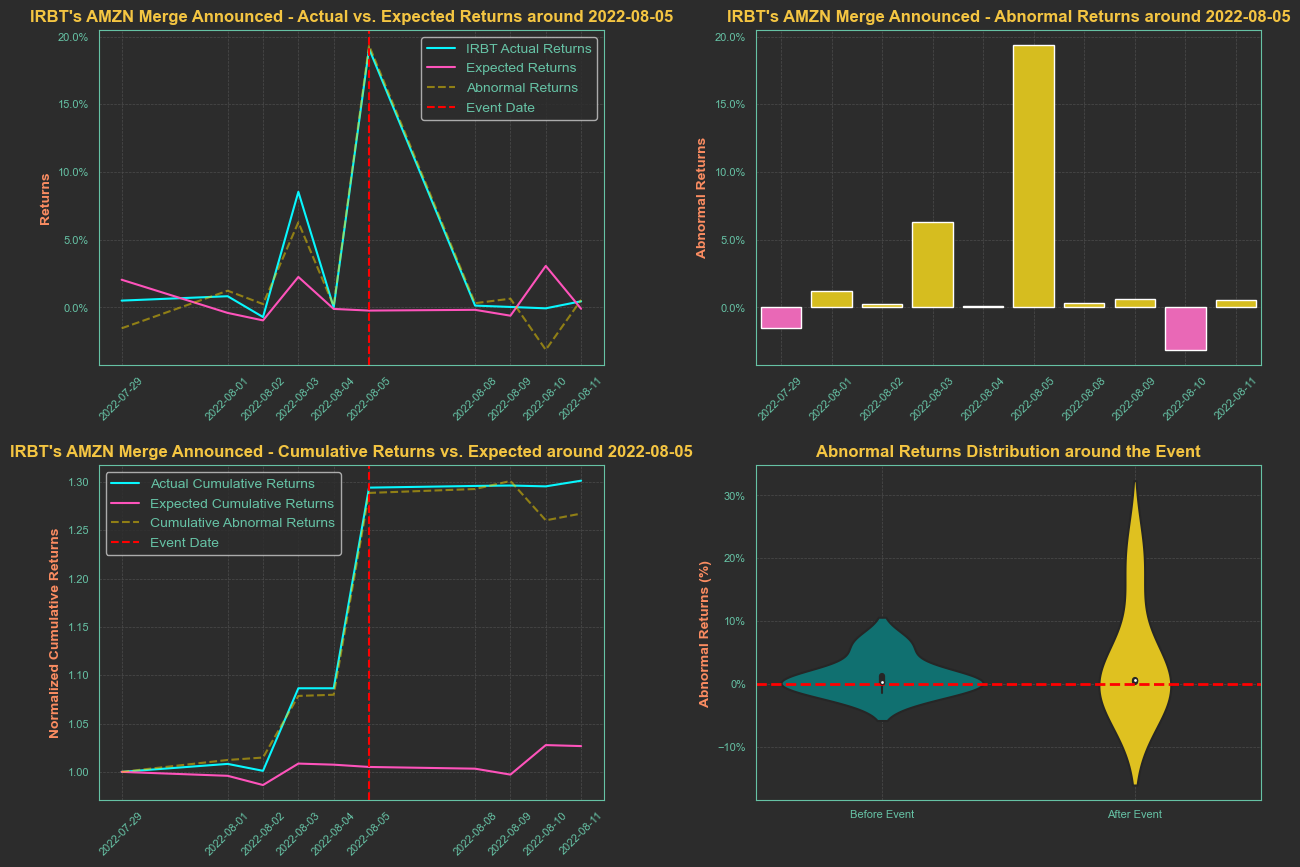

In [14]:
analyzer = StockEventAnalyzer("IRBT", "^GSPC", bef_event=5, aft_event=5, window_offset=30, window_size=180)
meta_events = [
    {"event": "IRBT's AMZN Merge Announced", "date": "2022-08-05"},
]

for event in meta_events:
    analyzer.analyze_event(event)

### **iRobot Event Study:**

The announcement of iRobot's merger with Amazon on August 5, 2022, was met with a significant positive reaction from investors, as evidenced by a 24.05% cumulative abnormal return (CAR) and an average abnormal return (AAR) of 2.41%. The notable increase in actual return on the event day, showing a 19.10% rise with an abnormal return of 19.34%, indicates a highly optimistic investor reception. The substantial T-stat for CAR at 4.411, well above the critical T-value, underscores the significance of the event's impact on IRBT's stock. This reaction suggests that investors perceived the merger as a strategic and beneficial move for iRobot, possibly due to the synergies and market advantages anticipated from joining forces with Amazon.



### Event Analysis

| Metric | Value |
| --- | --- |
| **Event** | AMZN's IRBT Merge Announced |
| **Base Stock** | AMZN |
| **Market** | ^GSPC |
| **Date** | 2022-08-05 |
| **Beta** | 1.61 |
| **Estimation Window** | 90 days before/after event |
| **Event Window** | 5 days before/after event |
| **Observations** | 10 trading days |

### Returns
| Metric | Value |
| --- | --- |
| **Cumulative AR** | 9.38% |
| **Average AR** | 0.94% |

### Hypothesis Testing
| Metric | Value |
| --- | --- |
| **Significance Level** | 0.05 |
| **Degrees of Freedom** | 9 |
| **Critical T-value** | 1.977 |
| **T-stat for AAR** | 1.283 |
| **T-stat for CAR** | 4.056 |
| **SD of AAR, CAR** | 0.0073, 0.0231 |

### Significance
| Metric | Value |
| --- | --- |
| **Is T-stat for AR significant?** | No |
| **Is T-stat for CAR significant?** | Yes |
| **Is CAR positive?** | Yes |
| **Is AAR positive?** | Yes |

### Expected, Actual, and Abnormal Returns

| Date | Expected Return | Actual Return | Abnormal Return |
| --- | --- | --- | --- |
| 2022-07-29 | 2.28% | 10.36% | 8.08% |
| 2022-08-01 | -0.45% | 0.33% | 0.78% |
| 2022-08-02 | -1.07% | -0.91% | 0.16% |
| 2022-08-03 | 2.51% | 4.00% | 1.48% |
| 2022-08-04 | -0.12% | 2.19% | 2.31% |
| 2022-08-05 | -0.26% | -1.24% | -0.98% |
| 2022-08-08 | -0.20% | -0.99% | -0.79% |
| 2022-08-09 | -0.68% | -1.13% | -0.45% |
| 2022-08-10 | 3.42% | 3.53% | 0.11% |
| 2022-08-11 | -0.11% | -1.44% | -1.32% |


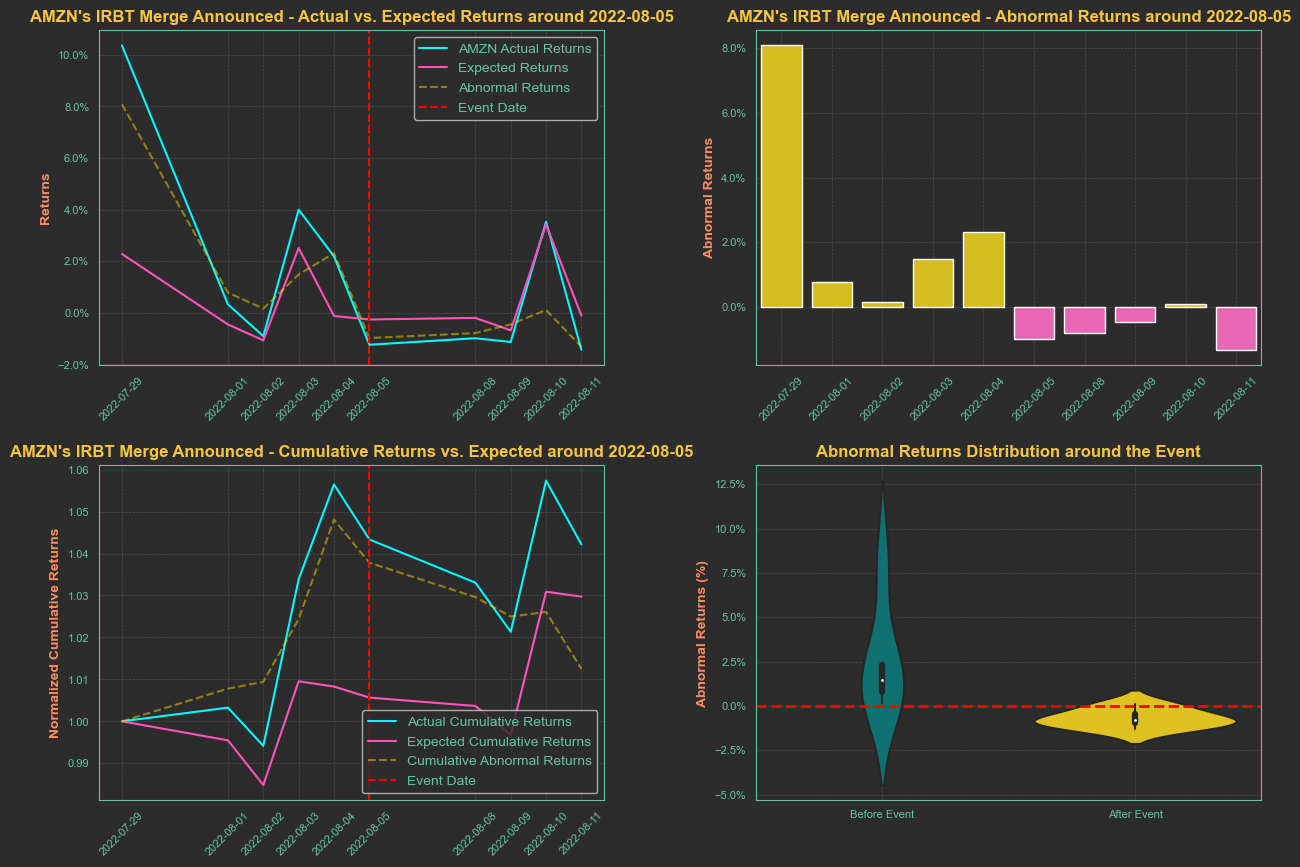

In [15]:
analyzer = StockEventAnalyzer("AMZN", "^GSPC", bef_event=5, aft_event=5, window_offset=30, window_size=180)
meta_events = [
    {"event": "AMZN's IRBT Merge Announced", "date": "2022-08-05"},
]

for event in meta_events:
    analyzer.analyze_event(event)


### E. Event Study on the Merger Announcement
The announcement of Amazon's acquisition of iRobot on August 5, 2022, resulted in a modest 9.38% cumulative abnormal return (CAR) for Amazon, with an average abnormal return (AAR) of 0.94%. Despite the statistical significance of the CAR, indicated by a T-stat of 4.056, the market's response was relatively muted. This subdued reaction suggests that while investors saw potential long-term benefits in the acquisition, it was perhaps not viewed as a major strategic shift for Amazon's expansive business portfolio.

### F. Timeline and Impact of Subsequent Events

- **List of Significant Events:**
  - **Event 1**: Reduction in Acquisition Price  
      - Amazon announced a reduction in its offer price for acquiring iRobot from $61 per share to $51.75 per share. (Date: **July 25, 2023**)
  - **Event 2**: EU Approval of the Deal 
      - The European Union was set to approve Amazon's acquisition of iRobot without any conditions. (Date: **November 23, 2023**)

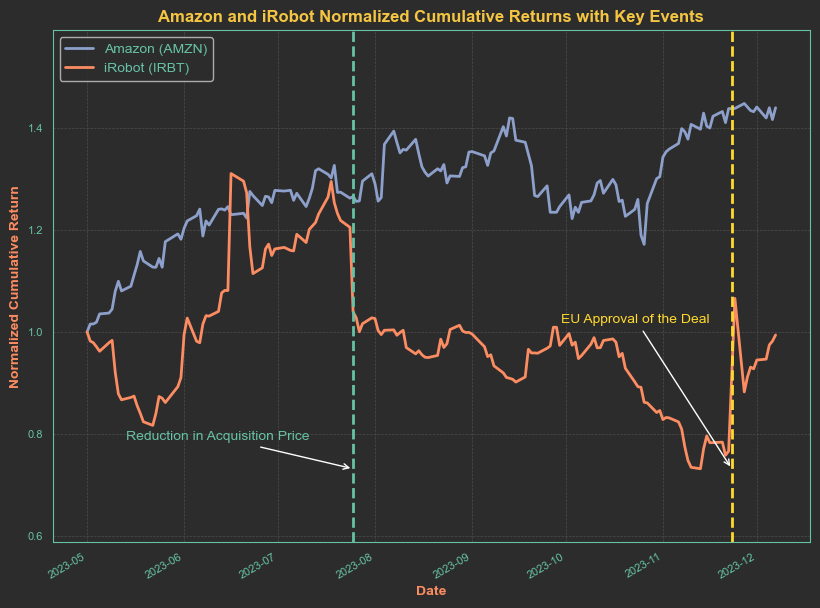

In [16]:
# Fetching the stock data for Amazon (AMZN) and iRobot (IRBT)
start_date = "2023-05-01" 
end_date = "2023-12-08" 

amzn = yf.download('AMZN', start=start_date, end=end_date, progress=False)
irbt = yf.download('IRBT', start=start_date, end=end_date, progress=False)

# Normalize the starting price to 1
amzn['Normalized'] = amzn['Adj Close'] / amzn.iloc[0]['Adj Close']
irbt['Normalized'] = irbt['Adj Close'] / irbt.iloc[0]['Adj Close']

# Determine min and max for ylim adjustment
normalized_min = min(amzn['Normalized'].min(), irbt['Normalized'].min())
normalized_max = max(amzn['Normalized'].max(), irbt['Normalized'].max())
ylim_lower = normalized_min - 0.2 * (normalized_max - normalized_min)
ylim_upper = normalized_max + 0.2 * (normalized_max - normalized_min)

# Plotting the normalized cumulative returns
fig, ax = plt.subplots(figsize=(8.3, 10*.618), facecolor='#2c2c2c')

ax.plot(amzn.index, amzn['Normalized'], label='Amazon (AMZN)', color="#8da0cb", linewidth=2)
ax.plot(irbt.index, irbt['Normalized'], label='iRobot (IRBT)', color="#fc8d62", linewidth=2)

# Setting y-axis limits
ax.set_ylim(ylim_lower, ylim_upper)

# Adding significant event markers and annotations
event1_date = pd.Timestamp("2023-07-25")
event2_date = pd.Timestamp("2023-11-23")

# Adjust annotation positions and make them more aesthetic
ax.axvline(event1_date, color="#66c2a5", linestyle="--", linewidth=2)  # Reduction in Acquisition Price
ax.axvline(event2_date, color="#ffd92f", linestyle="--", linewidth=2)  # EU Approval of the Deal

# Annotations with improved aesthetics
ax.annotate('Reduction in Acquisition Price', xy=(event1_date, normalized_min), 
            xytext=(event1_date - pd.Timedelta(weeks=2), normalized_min + (ylim_upper - ylim_lower) * 0.05), 
            arrowprops=dict(facecolor='#66c2a5', arrowstyle="->", connectionstyle="arc3"), 
            fontsize=10, color="#66c2a5", ha='right', va='bottom')

ax.annotate('EU Approval of the Deal', xy=(event2_date, normalized_min), 
            xytext=(event2_date - pd.Timedelta(weeks=1), normalized_min + (ylim_upper - ylim_lower) * 0.28), 
            arrowprops=dict(facecolor='#ffd92f', arrowstyle="->", connectionstyle="arc3"), 
            fontsize=10, color="#ffd92f", ha='right', va='bottom')

# Applying the styling
style_plot(ax, "Amazon and iRobot Normalized Cumulative Returns with Key Events", ylabel='Normalized Cumulative Return')

# Improve overall aesthetics
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
plt.tight_layout()

plt.legend()
plt.show()


- **Impact on Stocks:**
  - The announcement of the reduced acquisition price led to a significant 12% drop in iRobot's stock, reflecting investor concerns over the revised terms and the potential impact on the company's future. 
  
  - On the other hand, the EU's approval of the deal was a positive development, potentially easing some of the uncertainties that had been affecting the stocks of both Amazon and iRobot. This regulatory approval could be seen as a stabilizing factor for the stocks, indicating progress towards the completion of the acquisition.